***
***
# __Project 2__ : Logistic Regression



### __Team Members__
- __Masixole Boya__ - 1869204
- __Lebohang Mosia__ - 2320396
- __Thapelo Duma__ - 2493083
- __Lusanda Mdlhalose__ - 2332720

***
***

# __0. Imports__

### __0.1 Libraries and Dependencies__

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import numpy as np

### __0.2 Data Import__

In [2]:
df = pd.read_csv('data/Data_Scientists_data')

# __1. Data Exploration__

In [3]:
df.sample(5)

,ID,Pay,Perf,EstHap,Stay
116,117,18000,6,6,1
46,47,22000,4,6,1
84,85,27000,7,6,1
334,335,26000,8,5,1
130,131,19000,6,5,1


### __1.1 Data Summary__

The `ID` column in the dataset does not contribute meaningful information, and it therefore removed, as it is a unique identifier for each row (employee) in the dataset.
It does not carry any inherent information about the characteristics or behaviors of the employees. The model will be concerned with features that describe attributes or outcomes (i.e salary, performance, happiness).
Instead, including this column in regression can be misleading.
Models may mistakenly assign significance to the ID values, which are arbitrary and not related to the target variable (e.g., whether an employee stayed).

In [4]:
df.drop(columns='ID', inplace=True)
df = pd.DataFrame(df)

#### __1.1.1 Unique Values__

Exploring unique values for each column is important in data exploration as it provides a comprehensive understanding of the data's structure and diversity. This step helps identify categorical variables, detect anomalies or outliers, and assess the range of values in each feature. This helps us to think of further handling of the data. We are able to then take informed decisions about handling missing data, encoding categorical variables, and addressing any irregularities.

In [5]:
for i in df.columns:
    print(f"Unique values for column '{i}': {df[i].unique()}\n")


Unique values for column 'Pay': [ 33000  25000  16000  17000  28000  37000  18000  26000  31000  27000
  38000  24000  22000  23000  19000  13000  20000  44000  29000  21000
  32000  34000  15000  36000  35000  11000  30000  10000 295000  41000
  39000  14000  12000]

Unique values for column 'Perf': [ 6  5  7  3 10  9  8  4  2]

Unique values for column 'EstHap': [ 7  6  5  8  9  4 11]

Unique values for column 'Stay': [1 0 2]



#### __1.1.2 Detailed Data Overview__

Using the `df.info()` function in pandas is crucial in data exploration because it provides a comprehensive overview of the DataFrame's structure and content.<br>
The output starts by confirming that `df` is indeed a DataFrame object, followed by indicating that there are `500 entries` indexed from 0 to 499, which immediately tells us the size of the dataset. This is particularly useful for understanding the scope of the data we are dealing with. The summary then lists all columns `(Pay, Perf, EstHap, and Stay)`, alongside the count of `non-null` values for each column. In this case, every column has `500 non-null entries`, indicating that there are `no missing values`, which is essential for ensuring data integrity and deciding on necessary preprocessing steps. The `data types (dtype)` of each column are displayed next, revealing that all columns are of `type int64`, confirming that all the columns are numerical and can be used directly in calculations and models without further type conversion. Additionally, the memory usage is shown to be 15.8 KB, giving an idea of the dataset's footprint in memory, and this information is valuable when working with large datasets or limited memory resources. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pay     500 non-null    int64
 1   Perf    500 non-null    int64
 2   EstHap  500 non-null    int64
 3   Stay    500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


#### __1.1.3 Summary Statistics__

The output of the `.describe()` functiom is essential in data exploration because it provides a detailed statistical summary to help draw the image of the data's distribution, central tendencies, and variability. This summary includes key metrics such as the `count, mean, standard deviation, minimum, maximum`, and various percentiles `(25th, 50th, and 75th)` for the columns `Pay, Perf, and EstHap`. For instance, knowing that the average salary (Pay) is $23,602 with a high standard deviation of $13,519.81 indicates significant variation in salaries among employees. The performance ratings (Perf) and estimated happiness (EstHap) show means of approximately 6.05 and 6.44, respectively, with lower standard deviations, suggesting more consistency. The minimum and maximum values highlight the range within each column, such as the salary range from $10,000 to $295,000, performance ratings from 2 to 10, and happiness ratings from 4 to 11. The percentiles provide additional insights; for example, 25% of employees earn $19,000 or less, while 75% earn up to $27,000. This summary is key for identifying data trends, and detecting outliers.







In [7]:
df[['Pay', 'Perf', 'EstHap']].describe()

,Pay,Perf,EstHap
count,500.000000,500.000000,500.000000
mean,23602.000000,6.052000,6.440000
std,13519.806446,1.446887,0.984041
min,10000.000000,2.000000,4.000000
25%,19000.000000,5.000000,6.000000
50%,22000.000000,6.000000,6.000000
75%,27000.000000,7.000000,7.000000
max,295000.000000,10.000000,11.000000


In [8]:
print("Stay distribution:")
df['Stay'].value_counts()

Stay distribution:


Stay
1    457
0     42
2      1
Name: count, dtype: int64

# __1.2 Data Visualisation__

### __1.2.1 Distributions__

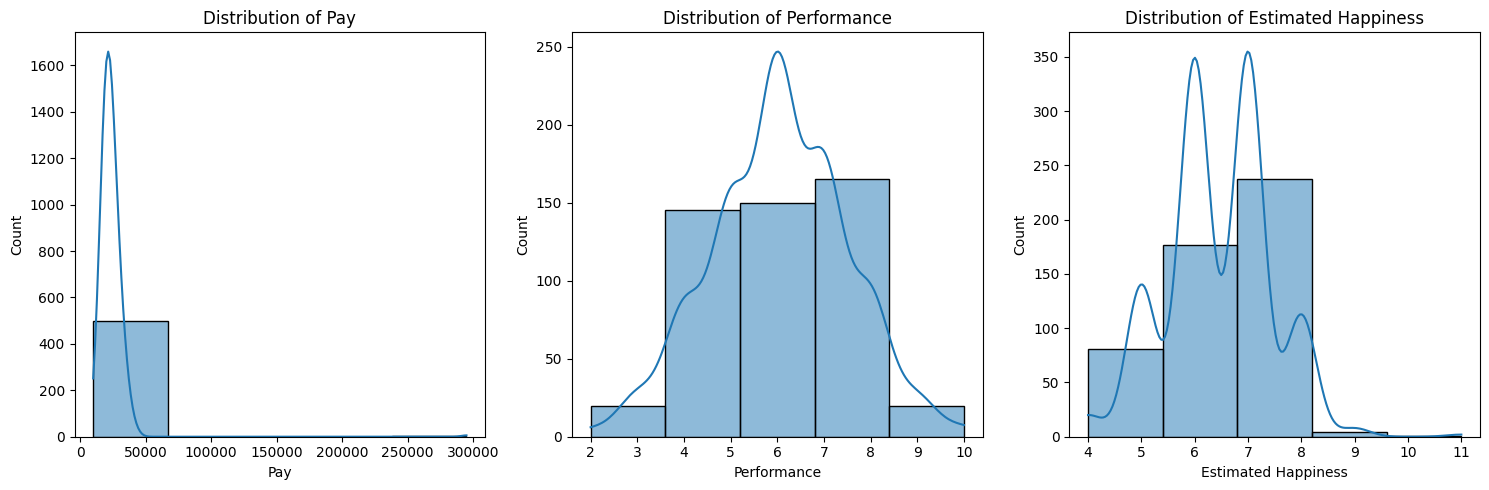

In [9]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for Pay
sns.histplot(df['Pay'], bins=5, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Pay')
axs[0].set_xlabel('Pay')
axs[0].set_ylabel('Count')

# Histogram for Perf
sns.histplot(df['Perf'], bins=5, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Performance')
axs[1].set_xlabel('Performance')
axs[1].set_ylabel('Count')

# Histogram for EstHap
sns.histplot(df['EstHap'], bins=5, kde=True, ax=axs[2])
axs[2].set_title('Distribution of Estimated Happiness')
axs[2].set_xlabel('Estimated Happiness')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


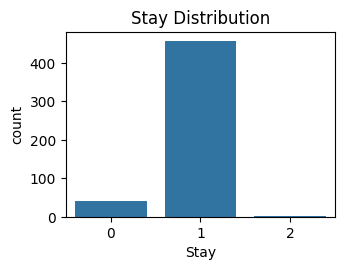

In [10]:
plt.subplot(2, 2, 4)
sns.countplot(x='Stay', data=df)
plt.title('Stay Distribution')

plt.tight_layout()
plt.show()


### __1.2.2 Correlation Matrix__

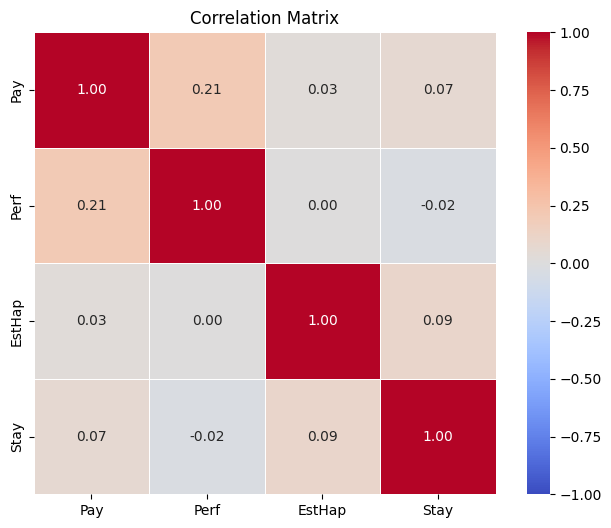

In [11]:
corr_matrix = df[['Pay', 'Perf', 'EstHap', 'Stay']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### __1.2.3 Correlation PLots__

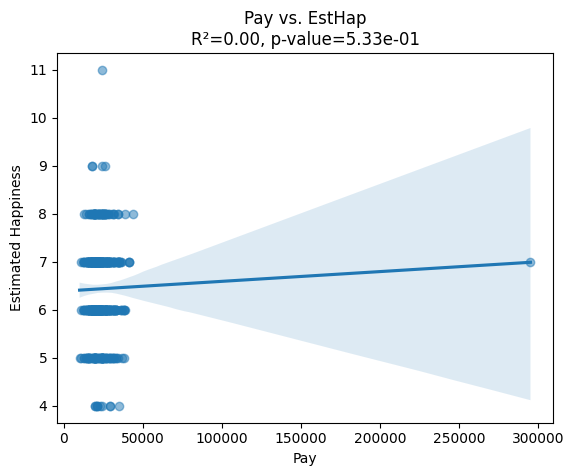

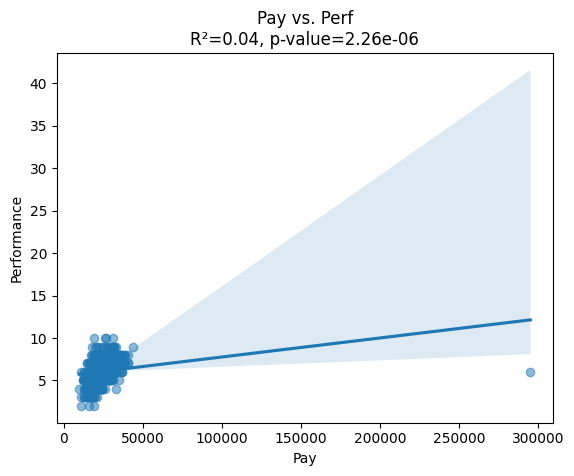

In [12]:

# Pay vs. EstHap
sns.regplot(x='Pay', y='EstHap', data=df, scatter_kws={'alpha':0.5})
slope, intercept, r_value, p_value, std_err = linregress(df['Pay'], df['EstHap'])
plt.title(f'Pay vs. EstHap\nR²={r_value**2:.2f}, p-value={p_value:.2e}')
plt.xlabel('Pay')
plt.ylabel('Estimated Happiness')

plt.show()

# Pay vs. Perf
sns.regplot(x='Pay', y='Perf', data=df, scatter_kws={'alpha':0.5})
slope, intercept, r_value, p_value, std_err = linregress(df['Pay'], df['Perf'])
plt.title(f'Pay vs. Perf\nR²={r_value**2:.2f}, p-value={p_value:.2e}')
plt.xlabel('Pay')
plt.ylabel('Performance')

plt.show()

### __1.2.4 Pair-Plot__

Below is a diagram that represents the combination of variables using scatter plots and the diagonal plots show the distribution of each individual variable. This is called a pair-plot. It is important to note that when the target "Stay" is on the y-axis the data is shown to be distributed over three separate classes: 0, 1, and 2. This occurs because there is a single data point related to a class of 2. This datapoint will be removed from the dataset in the pre-processing step. It is removed because logistic regression is an algorithm that is used for binary classification problems (or rather designed to classify data into one of two classes). Adding a third class defeats the purpose of the method.

**Diagonal Elements**

**Pay**: Shows a right-skewed distribution with most employees earning less than 50,000.

**Perf**: Indicates a uniform distribution across performance ratings. 

**EstHap**: Estimated Happiness scores are fairly evenly spread, with some common scores. 

**Stay**: It is safe to say that most employees stay (shown by the high bar at 1).

**Other Plots**

**Pay** **vs** **Performance**: There is no clear relationship between Pay and Performance because the datapoints are randomly scattered. This indicates that the payment does not directly correlate with performance.

**Pay** **vs** **EstHap**: The payment and estimated happiness do not have a clear relationship as well. The datapoints are scattered randomly without a distinct pattern.

**Pay** **vs** **Stay**: The plot does not have a clear pattern that indicates how pay influences whether an employee leaves or stays. However, from the histogram we see that the salaries of the employees are relatively.

**Perf vs EstHap** : There is no clear correlation between the Performance and Estimated Happiness.

**Perf vs Stay** : From the scatter plot, there is no discernible pattern that indicates whether performance significantly influences whether an employee leaves or stays.

**EstHap vs Stay** : Like the other variables, we do not find a specific trend between these two features.

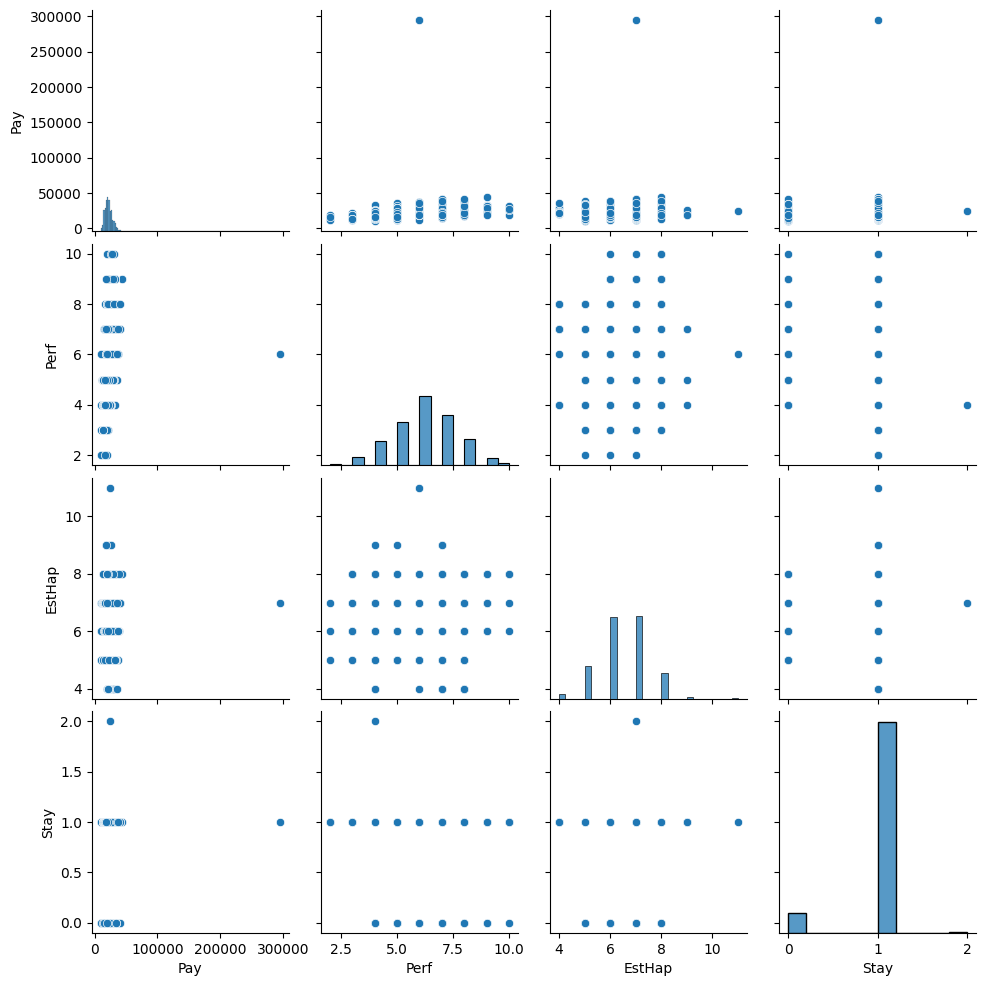

In [13]:
sns.pairplot(df)

# __2. Feature selection__

### __Scatter Plot Exclusion__
The Stay column in our dataset is a binary variable (0 or 1), which represents whether an employee stayed (Stay = 1) or left (Stay = 0) the company. Scatter plots are typically used to visualize the relationship between two continuous variables. If we wish to use the variable in a scatter plot, we would need to plot it against the other variables. Since Stay is a categorical variable (even though it's represented numerically as 0 and 1), it doesn't make sense to create a scatter plot with Stay as one of the variables.

Focusing on distribution analysis provides a more meaningful insight into how Pay, Performance, and Estimated Happiness vary with Stay. By analyzing the distributions within these variables, this approach helps in identifying patterns and correlations that might indicate why an employee decides to stay or leave. We compare our `Stay` variable with the three other variables(Pay, Performance and Estimated Happiness) and visualise the distributions to discover patterns and correlations. We initially explore the relationships between `Pay`, `Performance (Perf)`, and `Estimated Happiness (EstHap)` using scatter plots and linear regression. The intention here is to understand if there are any linear relationships between these variables.

### __Why we did these things__

The use of scatter plots with regression lines helps in visually and statistically assessing the linear relationships between continuous variables. Understanding these relationships is crucial as it can highlight if higher pay correlates with higher performance or happiness, which can be critical insights for employee retention strategies.

Insightful Visualization: By Analyzing the distributions, we are allowed to the identify the specific ranges or thresholds of `Pay`, `Performance`, and `Estimated Happiness` that might influence an employee’s decision to stay or leave. This is more actionable for decision making.

### __Iterations__

Each iteration in the analysis involves:

Visualizing Relationships: Starting with scatter plots to understand the baseline relationships between continuous variables.

Performing Statistical Analysis: Using linear regression to quantify these relationships.

Selecting Appropriate Methods for Binary Variables: Adapting the analysis techniques to handle binary variables appropriately, ensuring that the insights are relevant and actionable.

# __3. Modelling__

In [14]:
import sklearn
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### **Data Preprocessing**

In [15]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [16]:
df = df[df['Stay'] != 2]
df

,Pay,Perf,EstHap,Stay
0,33000,6,7,1
1,25000,6,7,1
2,16000,5,6,1
3,17000,7,7,1
4,28000,7,7,1
...,...,...,...,...
495,18000,9,6,1
496,21000,7,6,1
497,18000,7,9,1
498,35000,6,7,1


In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[0.08070175, 0.5       , 0.42857143],
       [0.05263158, 0.5       , 0.42857143],
       [0.02105263, 0.375     , 0.28571429],
       ...,
       [0.02807018, 0.625     , 0.71428571],
       [0.0877193 , 0.5       , 0.42857143],
       [0.09824561, 0.625     , 0.28571429]])

In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
495    1
496    1
497    1
498    1
499    1
Name: Stay, Length: 500, dtype: int64

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, random_state=42, test_size=0.3)
X_val, X_test,  y_val, y_test = train_test_split(X_temp, y_temp, random_state=42, test_size=0.5)

### __3. Model Fitting, Hyperparameter Tuning and Final Accuracy__

### __3.1 Data Splitting__

Training set shape: (299, 1), (299,)
Validation set shape: (100, 1), (100,)
Test set shape: (100, 1), (100,)


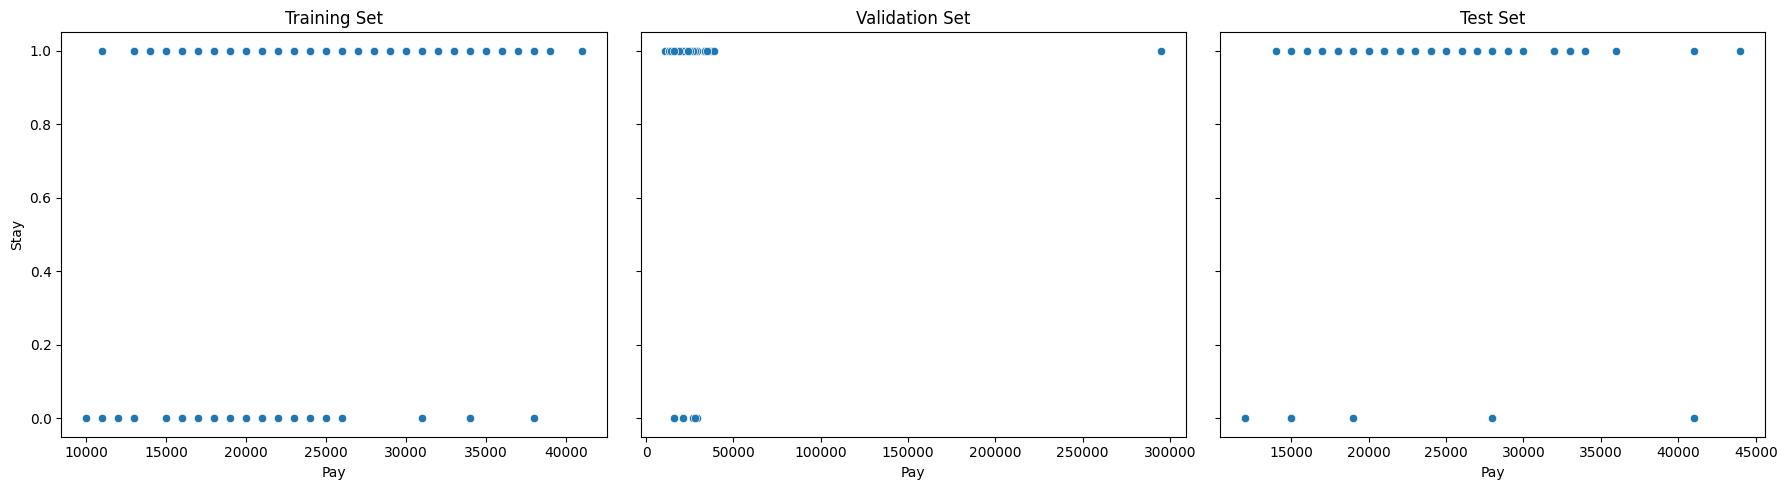

In [21]:
# Stay vs Pay
X = df[['Pay']] 
y = df['Stay']   

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

# Visualize the splits
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot training set
sns.scatterplot(x=X_train['Pay'], y=y_train, ax=axs[0])
axs[0].set_title('Training Set')
axs[0].set_xlabel('Pay')
axs[0].set_ylabel('Stay')

# Plot validation set
sns.scatterplot(x=X_val['Pay'], y=y_val, ax=axs[1])
axs[1].set_title('Validation Set')
axs[1].set_xlabel('Pay')
axs[1].set_ylabel('Stay')

# Plot test set
sns.scatterplot(x=X_test['Pay'], y=y_test, ax=axs[2])
axs[2].set_title('Test Set')
axs[2].set_xlabel('Pay')
axs[2].set_ylabel('Stay')

plt.tight_layout()
plt.show()

Training set shape: (299, 1), (299,)
Validation set shape: (100, 1), (100,)
Test set shape: (100, 1), (100,)


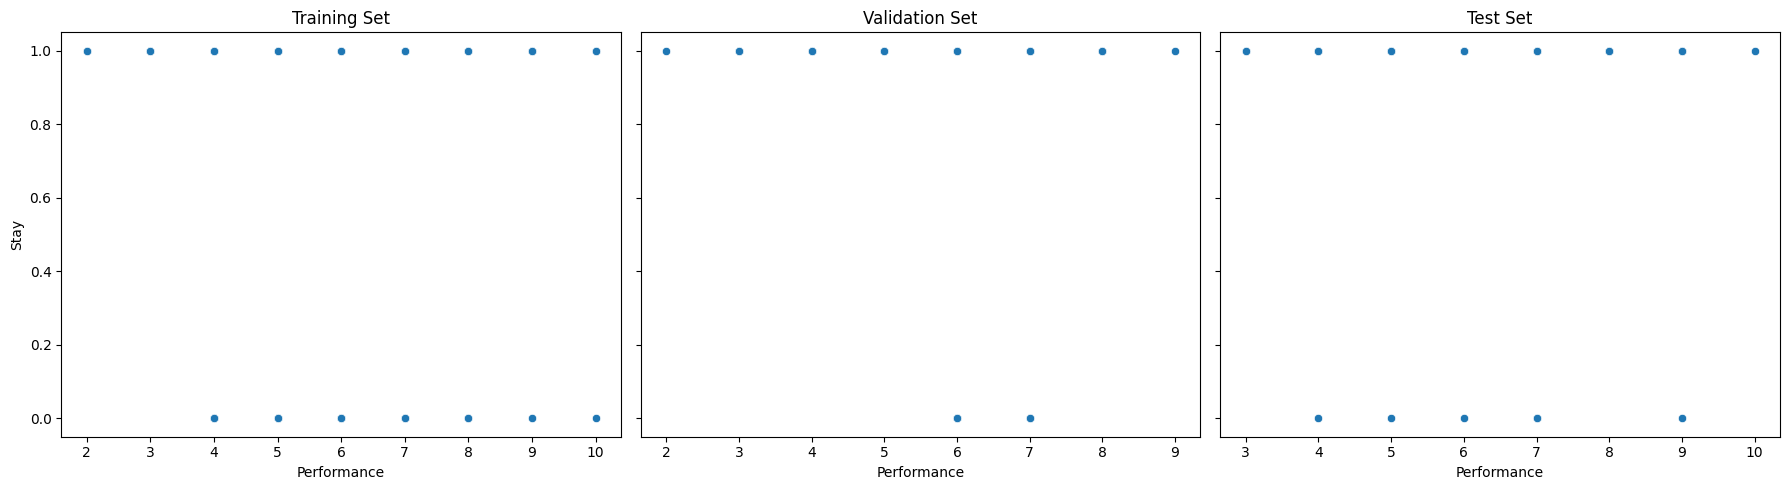

In [22]:
# Stay vs Perf
X = df[['Perf']]  
y = df['Stay']   

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

# Visualize the splits
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot training set
sns.scatterplot(x=X_train['Perf'], y=y_train, ax=axs[0])
axs[0].set_title('Training Set')
axs[0].set_xlabel('Performance')
axs[0].set_ylabel('Stay')

# Plot validation set
sns.scatterplot(x=X_val['Perf'], y=y_val, ax=axs[1])
axs[1].set_title('Validation Set')
axs[1].set_xlabel('Performance')
axs[1].set_ylabel('Stay')

# Plot test set
sns.scatterplot(x=X_test['Perf'], y=y_test, ax=axs[2])
axs[2].set_title('Test Set')
axs[2].set_xlabel('Performance')
axs[2].set_ylabel('Stay')

plt.tight_layout()
plt.show()

Training set shape: (299, 1), (299,)
Validation set shape: (100, 1), (100,)
Test set shape: (100, 1), (100,)


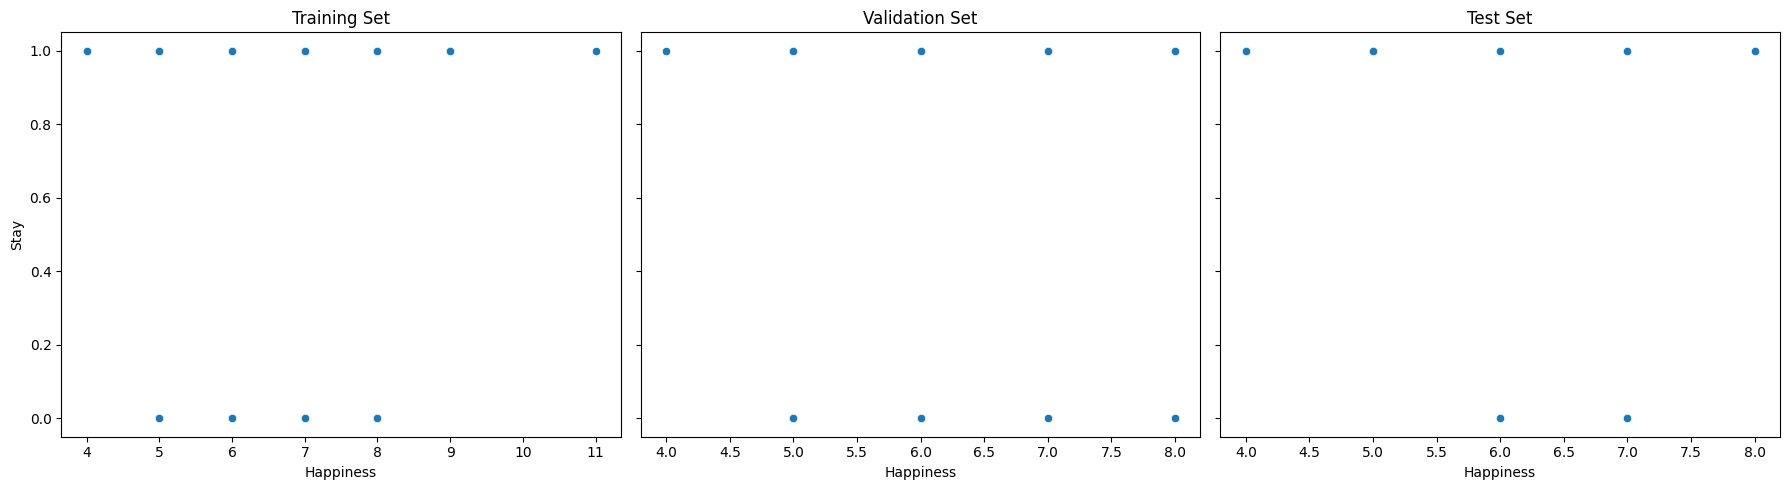

In [23]:
X = df[['EstHap']]  
y = df['Stay']   

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot training set
sns.scatterplot(x=X_train['EstHap'], y=y_train, ax=axs[0])
axs[0].set_title('Training Set')
axs[0].set_xlabel('Happiness')
axs[0].set_ylabel('Stay')

# Plot validation set
sns.scatterplot(x=X_val['EstHap'], y=y_val, ax=axs[1])
axs[1].set_title('Validation Set')
axs[1].set_xlabel('Happiness')
axs[1].set_ylabel('Stay')

# Plot test set
sns.scatterplot(x=X_test['EstHap'], y=y_test, ax=axs[2])
axs[2].set_title('Test Set')
axs[2].set_xlabel('Happiness')
axs[2].set_ylabel('Stay')

plt.tight_layout()
plt.show()

## __3.2 Fitting the Model On the Training Set (Using the Sigmoid Function)__

Training set shape: (299, 1), (299,)
Validation set shape: (100, 1), (100,)
Test set shape: (100, 1), (100,)


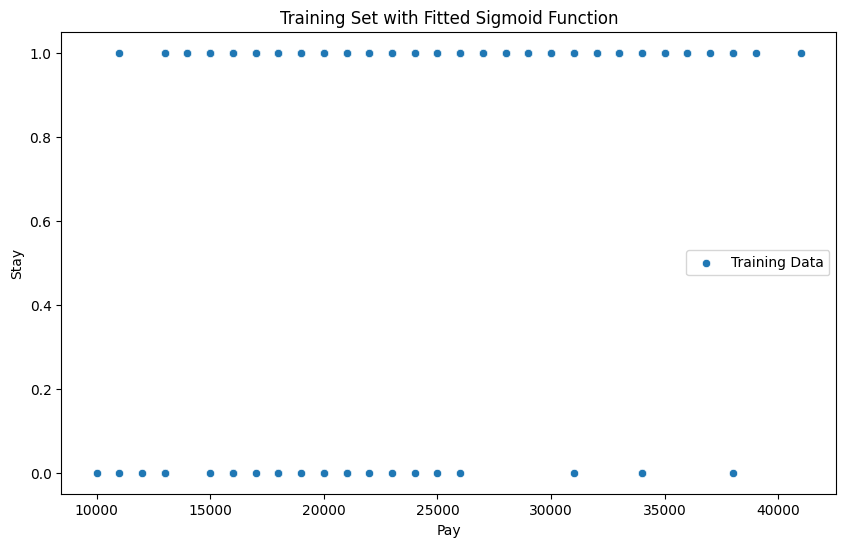

In [24]:
X = df[['Pay']]  
y = df['Stay']   

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

# fitting the logistic regression model to training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Visualizing the training set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Pay'], y=y_train, label='Training Data')

X_values = np.linspace(X_train['Pay'].min(), X_train['Pay'].max(), 300).reshape(-1, 1)
X_values_df = pd.DataFrame(X_values, columns=['Pay'])
y_values = model.predict_proba(X_values_df)[:, 1]

plt.title('Training Set with Fitted Sigmoid Function')
plt.xlabel('Pay')
plt.ylabel('Stay')
plt.show()

Training set shape: (299, 1), (299,)
Validation set shape: (100, 1), (100,)
Test set shape: (100, 1), (100,)


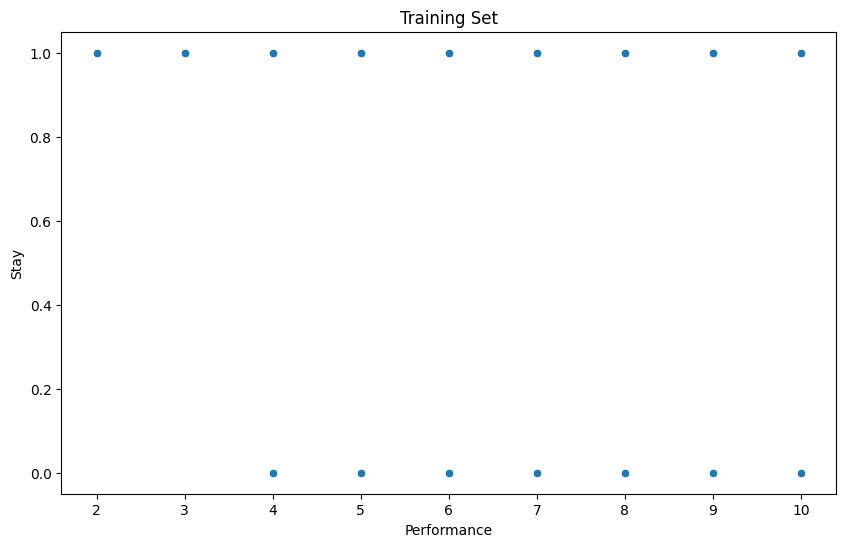

In [25]:
X = df[['Perf']]  
y = df['Stay']   

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')

# Visualizing the training set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Perf'], y=y_train)
plt.title('Training Set')
plt.xlabel('Performance')
plt.ylabel('Stay')
plt.show()

Training set shape: (299, 1), (299,)
Validation set shape: (100, 1), (100,)
Test set shape: (100, 1), (100,)


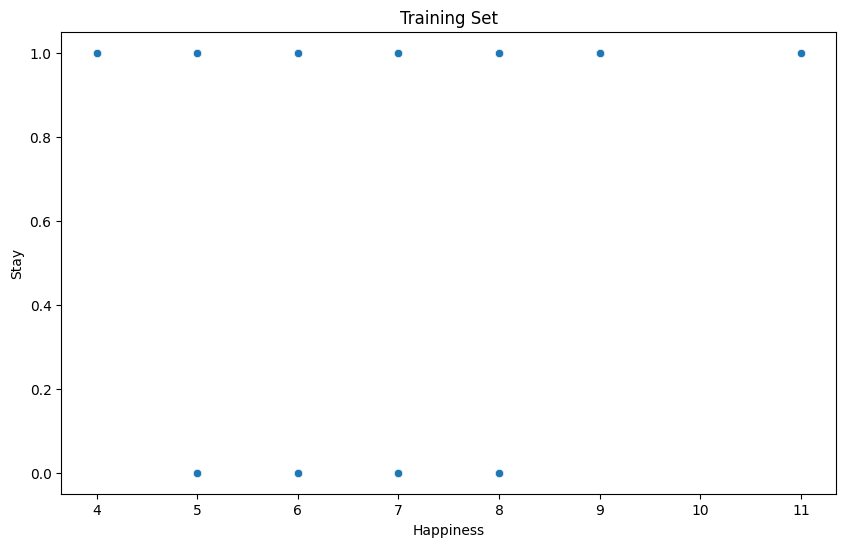

In [26]:
X = df[['EstHap']]  
y = df['Stay']   

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Validation set shape: {X_val.shape}, {y_val.shape}')
print(f'Test set shape: {X_test.shape}, {y_test.shape}')


# Visualizing the training set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['EstHap'], y=y_train)
plt.title('Training Set')
plt.xlabel('Happiness')
plt.ylabel('Stay')
plt.show()

### **Before Hyparameter Tuning**

In [27]:
# model 1
logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_val)

#model 2
# logistic_cv = LogisticRegressionCV(cv=3, random_state=42)
# logistic_cv.fit(X_train, y_train)
# y_pred = logistic_cv.predict(X_val)

In [28]:
def model_evaluation(true_targets, predict_targets, model):
    if isinstance(model, LogisticRegression):
        Name = "Logistic Regression"

    elif isinstance(model, LogisticRegressionCV):
        Name = "Logistic Regression with CV"


    # the classification report of a model
    report = classification_report(true_targets, predict_targets, zero_division=True)
    print(f'The classification report for the {Name} is: \n {report}')

    # the confusion matrix of the model
    cm = confusion_matrix(true_targets, predict_targets, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.plasma)
    disp.ax_.grid(False)
    plt.title(Name+ " confusion matrix")

    return

The classification report for the Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         6
           1       0.94      1.00      0.97        94

    accuracy                           0.94       100
   macro avg       0.97      0.50      0.48       100
weighted avg       0.94      0.94      0.91       100



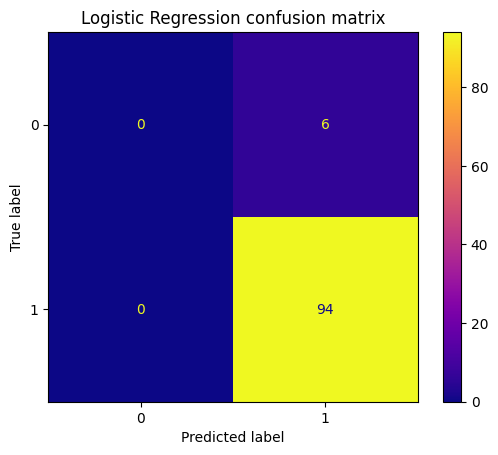

In [29]:
model_evaluation(y_val, y_pred, logistic)

In [30]:
# model_evaluation(y_val, y_pred, logistic_cv)

### **Hyperparamater Tuning**

In [31]:
def hyperparameter_tuning(model):

    # parameter grid with compatible parameters
    param_grid = [
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear'],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [100, 200, 500, 1000, 2000],
            'class_weight': [None, 'balanced'],
            'fit_intercept': [True, False]
        },
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['l2'],
            'solver': ['newton-cg', 'lbfgs', 'sag'],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [100, 200, 500, 1000, 2000],
            'class_weight': [None, 'balanced'],
            'fit_intercept': [True, False]
        },
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
            'penalty': ['elasticnet'],
            'solver': ['saga'],
            'tol': [1e-4, 1e-3, 1e-2, 1e-1],
            'max_iter': [100, 200, 500, 1000, 2000],
            'class_weight': [None, 'balanced'],
            'fit_intercept': [True, False],
            'l1_ratio': [0, 0.15, 0.5, 0.7, 1]
        }
    ]

    # the grid search model
    grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Best parameters 
    best_params = grid_search.best_params_

    return best_params


In [32]:
best_params = hyperparameter_tuning(logistic)
for key, value in best_params.items():
    print(f'{key} = {value},')

C = 0.001,
class_weight = None,
fit_intercept = True,
max_iter = 100,
penalty = l2,
solver = liblinear,
tol = 0.0001,


In [33]:
# best_params = hyperparameter_tuning(logistic_cv)
# print(best_params)

### **After Hyperparamater Tuning**

In [34]:
best_logistic = LogisticRegression(
                C = 0.001,
                class_weight = None,
                fit_intercept = True,
                max_iter = 100,
                penalty = 'l2',
                solver = 'liblinear',
                tol = 0.0001,
                random_state=42
)


best_logistic.fit(X_train, y_train)
y_pred_best = best_logistic.predict(X_test)

The classification report for the Logistic Regression is: 
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         6
           1       0.94      1.00      0.97        94

    accuracy                           0.94       100
   macro avg       0.97      0.50      0.48       100
weighted avg       0.94      0.94      0.91       100



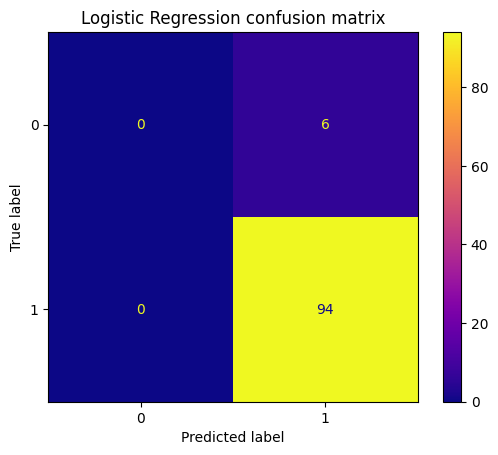

In [35]:
model_evaluation(y_test, y_pred_best, best_logistic)

# __4. Models and Variables__

__Logistic Regression Model:__ This model is used here to predict the binary outcome, `Stay` (whether an employee stays or leaves), based on variables including `performance,` `estimated happiness,` and `pay.`
__Variables Considered:__ 
- Performance : A continuous variable ranging from 0 to 100, representing employee performance.
- Estimated Happiness : A continuous variable from 0 to 10, indicating employee happiness.
- Pay : A continuous variable ranging from 0 to 100,000, representing employee salary.
- Stay : A binary variable (0 or 1), indicating if an employee stays (1) or leaves (0).

__Evaluation of the Model and Variables__:

__Suitability of Logistic Regression:__

- Performance : Performance often impacts employee retention. If there's a linear relationship between performance and the likelihood of staying (e.g., higher performance leading to higher retention probability), logistic regression is appropriate.

- Estimated Happiness : Happiness can be a predictor of staying. A higher happiness score might increase the likelihood of an employee staying. The relationship here could be linear, justifying the use of logistic regression.

- Pay : Pay impacts decisions to stay or leave. Higher pay generally increases the probability of staying, assuming a linear relationship.

__Strengths and Limitations:__

__Strengths:__

 - Interpretability : Logistic regression provides coefficients that can be interpreted as log-odds, showing the direction and magnitude of the effect each predictor has on the likelihood of staying.
- Efficiency : It’s computationally efficient, especially with a few predictors.

__Limitations:__

- Linearity Assumption : It assumes a linear relationship between the predictors and the log-odds of the outcome.
- Sensitivity to Outliers : Outliers can affect model performance if not addressed. Something like the "Stay" value in the model being a 2. A value like that should be ommitted from the data as it is not a valid input.

# __5. Data and Intuition__

### __Scatter Plot Analysis__

__Performance vs. Stay__
- Intuition : If scatter plots show a trend where high performance correlates with higher retention rates, logistic regression is appropriate.
- Observations: Employees with higher performance are more likely to stay, indicated by a higher concentration of "Stay" values (1) at higher performance levels.
- Model Fit: The data shows a trend that can be captured by logistic regression, assuming a linear increase in log-odds.

__Estimated Happiness vs. Stay__
- Intuition : If scatter plots indicate that employees with higher happiness scores are more likely to stay, the logistic regression model aligns well.
- Observations: Higher happiness scores show a greater likelihood of staying, indicated by higher "Stay" values at higher happiness levels.
- Model Fit: The relationship looks suitable for logistic regression, supporting the assumption of linear log-odds increase.

__Pay vs. Stay__
- Intuition : If scatter plots show a trend where higher pay correlates with higher retention rates, logistic regression is appropriate.
- Observations: Employees with higher pay show a higher tendency to stay, evident from more "Stay" values at higher pay levels.
- Model Fit: The scatter plot indicates a trend that aligns with logistic regression assumptions, fitting a linear log-odds increase.

# __Conclusion__

The logistic regression model makes sense in terms of the variables:

- Performance : Shows a positive relationship with staying, appropriate for logistic regression.
- Estimated Happiness : Correlates positively with staying, fitting the logistic regression model.
- Pay : Also shows a positive correlation with staying, suitable for logistic regression.

Scatter Plots Intuition : The visual trends observed in the scatter plots align with the logistic regression model’s predictions. Higher values in "Performance," "Estimated Happiness," and "Pay" increase the likelihood of an employee staying, supporting the logistic regression model's assumptions.  